# Decision Tree Classifier


## Методы машинного обучения. Упражнение 8

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Задание 1

In [2]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/0c61cf43490f9189f8ddb65a887dcc64/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/Bank_Personal_Loan_Modelling_train.csv')

In [3]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
df = df.drop('ID', axis=1)

<Axes: >

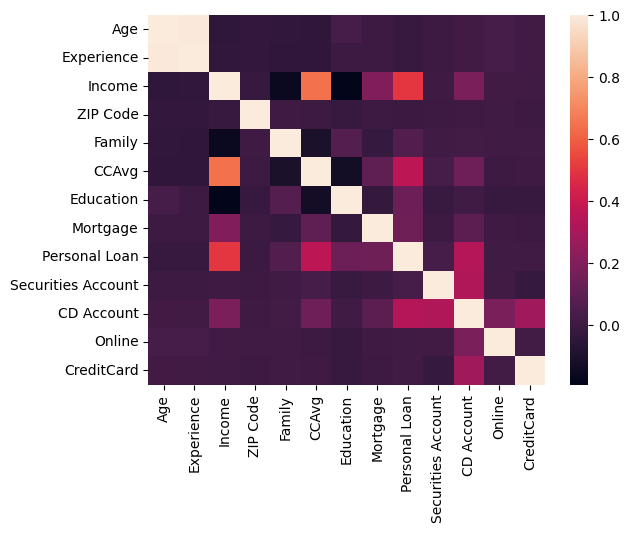

In [5]:
sns.heatmap(df.corr())

Age, Experience

ZIP Code

In [6]:
df = df.drop('ZIP Code', axis=1)

2. Предварительная подготовка данных

Модификация признаков

Стоит разобраться с полем Experience. Видно, что опыт коррелирует с возрастом. Однако, в поле Experience присутствуют отрицательные значения. Имеет смысл «сдвинуть» значения в этой колонке. Добавьте ко всем значениям колонки Experience одно и то же число так, чтобы минимальное значение было равно .

Вычислите выборочное среднее колонки Experience после преобразования.

In [7]:
df['Experience'] = df['Experience'] - df['Experience'].min()

In [8]:
df['Experience'].mean()

23.19625

Аналогично имеет смысл модифицировать поле CCAvg. Раз рассматривается годовой доход, то и значение трат стоит рассматривать за целый год.

In [9]:
df['CCAvg'] = df['CCAvg'] * 12
df['CCAvg'].mean()

23.06166

Определение выбросов

Постройте ящики с усами для всех предикторов. Рекомендуем использовать sns.boxplot(). Определите признак по следующему изображению boxplot.

Age


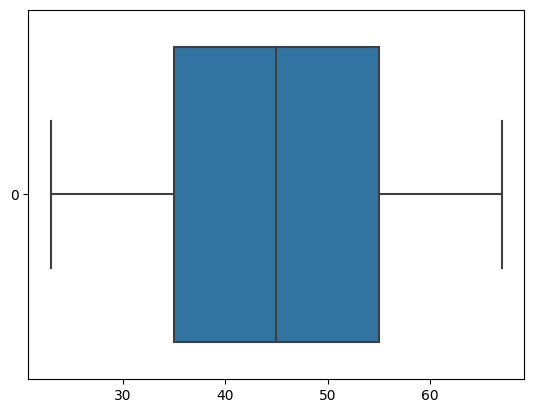

Experience


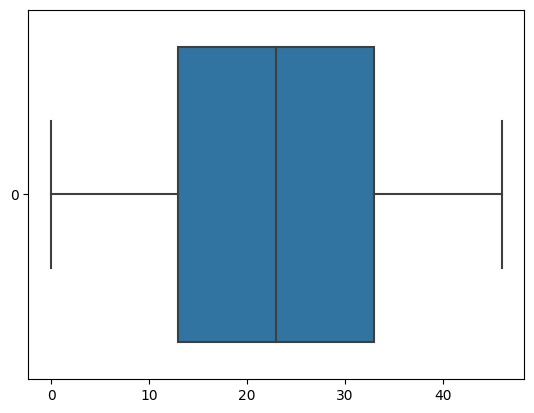

Income


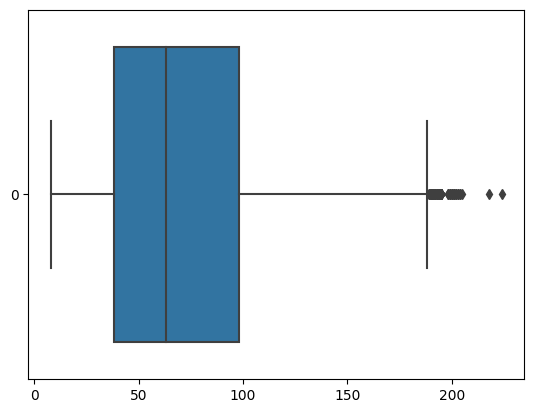

Family


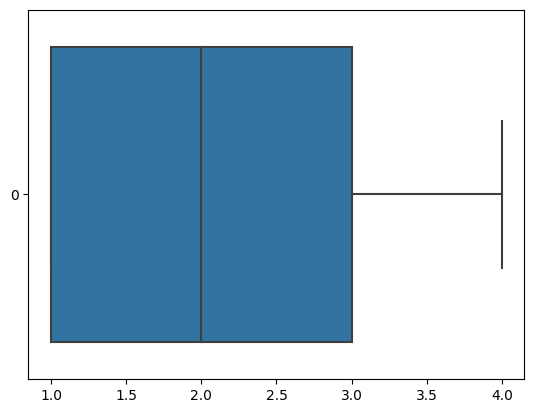

CCAvg


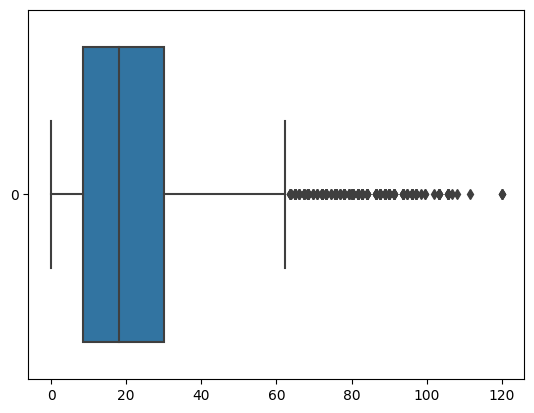

Education


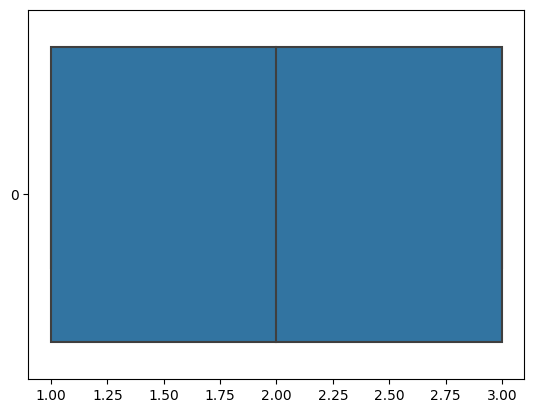

Mortgage


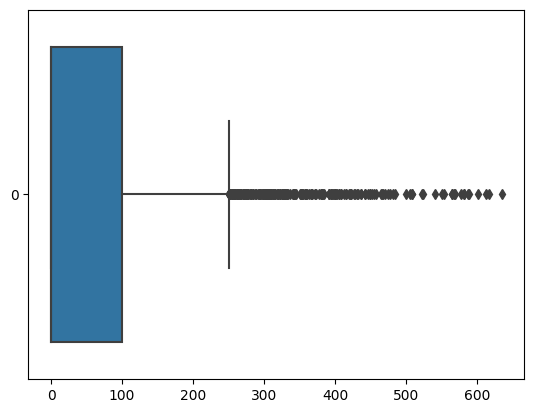

Personal Loan


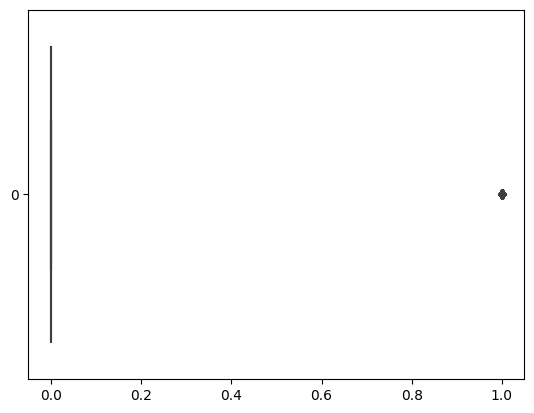

Securities Account


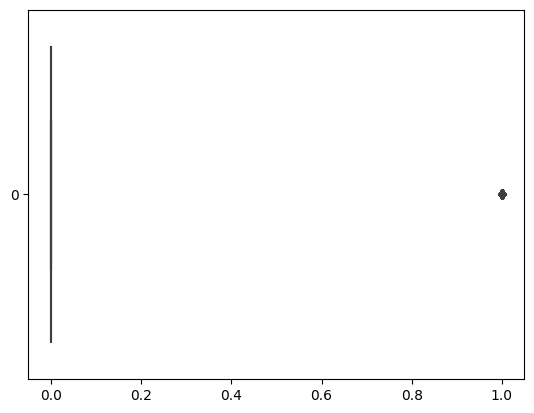

CD Account


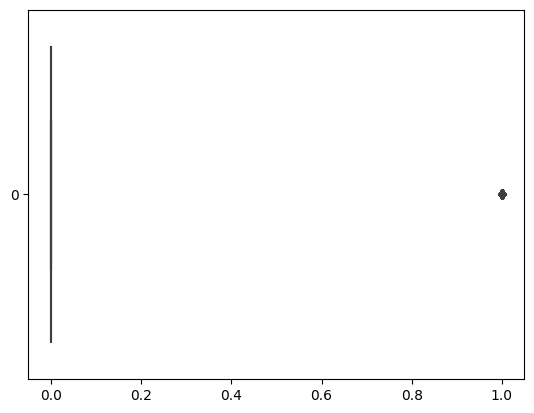

Online


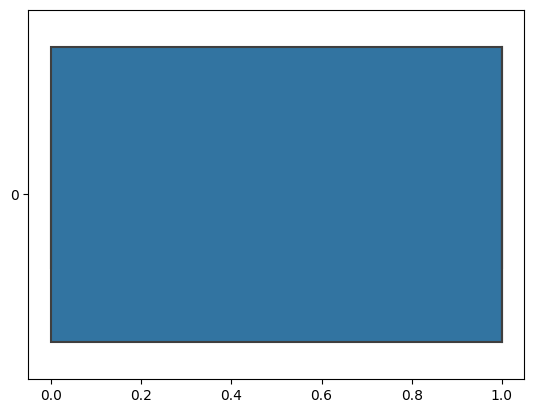

CreditCard


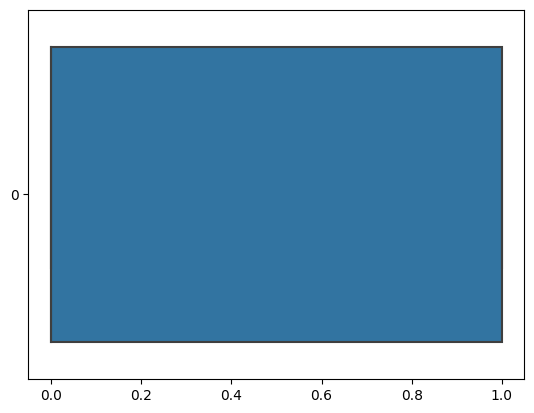

In [10]:
for col in df.columns:
  print(col)
  sns.boxplot(df[col], orient='horisontal')
  plt.show()

Определите признак, содержащий наибольшее число выбросов.

Mortgage

Имеет смысл поработать с этим признаком, а для этого стоит руководствоваться следующими статистическими соображениями. Если вычесть из данных выборочное среднее, а после поделить на среднеквадратическое отклонение, то, пользуясь правилом 3-$\sigma$ для нормального распределения, можно выбросить слишком далекие от нуля хвосты. Постройте гистограмму распределения значений в рамках этого признака.

Очевидно в рамках этого признака есть небольшое количество значений, которые лежат далеко. Можно использовать <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> функцию из библиотеки <code>scipy</code>.

Вспомнив курс теории вероятностей, становится понятно, что около $99.7\%$ нормального распределения сождержатся в отрезке $[-3\sigma, 3\sigma]$. Определите число элементов, модуль <code>z-score</code> которых больше, чем $3$.

In [11]:
df['Mortgage_ballanced'] = (df['Mortgage'] - df['Mortgage'].mean()) / np.std(df['Mortgage'])

<Axes: >

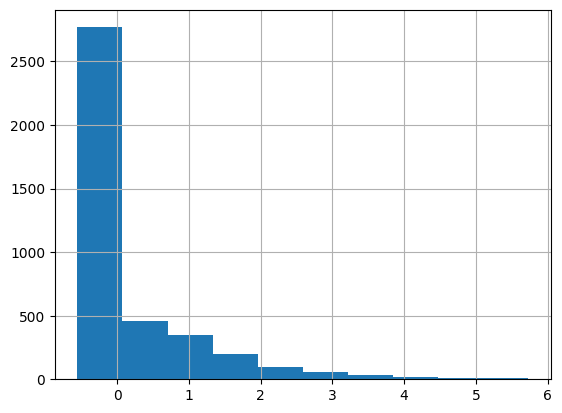

In [12]:
df['Mortgage_ballanced'].hist()

In [13]:
(abs(stats.zscore(df['Mortgage_ballanced'])) > 3).sum()

83

Итак, выбросов не очень много, поэтому их можно просто выбросить из рассматриваемого набора данных.

Введите оставшееся в датасете число строк.

In [14]:
df = df.loc[(stats.zscore(df['Mortgage_ballanced']) <= 3)]

In [15]:
df.shape

(3917, 13)

In [16]:
df = df.drop('Mortgage_ballanced', axis=1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,37,14,59,4,2.4,3,0,0,0,0,0,0
3996,36,13,91,1,18.0,3,289,0,0,0,1,0
3997,57,34,131,2,32.4,1,0,0,0,0,0,0
3998,40,18,83,1,12.0,3,0,0,0,0,0,0


3. Построение моделей

Базовый алгоритм

При помощи train_test_split() разбейте набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=11. Используйте стратификацию по колонке Personal Loan. Обучите модель DecisionTreeClassifier() на тренировочном наборе данных со следующими параметрами: random_state=11, criterion='gini'. Оцените модель на тестовых данных.

Вычислите f1_score() модели на тестовых данных.

In [17]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [18]:
random_state = 33

In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(X,y,
                                                                    test_size=0.2,
                                                                    random_state=random_state,
                                                                    stratify=y)

In [20]:
decisionTree = DecisionTreeClassifier(criterion='gini', random_state=random_state)
decisionTree.fit(train_data, train_labels)
predictions = decisionTree.predict(test_data)

In [21]:
f1_score(test_labels, predictions)

0.8611111111111112

Обучите модель DecisionTreeClassifier() на тренировочном наборе данных со следующими параметрами: random_state=11, criterion='entropy'. Оцените модель на тестовых данных.

Вычислите f1_score() модели на тестовых данных.

In [22]:
decisionTree = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
decisionTree.fit(train_data, train_labels)
predictions = decisionTree.predict(test_data)

In [23]:
f1_score(test_labels, predictions)

0.8591549295774648

Учет дисбаланса соотношения классов

Обучите модель DecisionTreeClassifier() на тренировочном наборе данных со следующими параметрами: random_state=11, criterion='gini', class_weight='balanced'. Оцените модель на тестовых данных.

Вычислите f1_score() модели на тестовых данных.

In [24]:
decisionTree = DecisionTreeClassifier(criterion='gini', random_state=random_state, class_weight='balanced')
decisionTree.fit(train_data, train_labels)
predictions = decisionTree.predict(test_data)

In [25]:
f1_score(test_labels, predictions)

0.896551724137931

Обучите модель DecisionTreeClassifier() на тренировочном наборе данных со следующими параметрами: random_state=11, criterion='entropy', class_weight='balanced'. Оцените модель на тестовых данных.

In [26]:
decisionTree = DecisionTreeClassifier(criterion='entropy', random_state=random_state, class_weight='balanced')
decisionTree.fit(train_data, train_labels)
predictions = decisionTree.predict(test_data)

In [27]:
f1_score(test_labels, predictions)

0.9054054054054054

Upsampling обучающей выборки

Постройте гистограмму распределения объектов по классам для обучающей выборки.

Определите долю элементов класса  тренировочного набора данных.

In [28]:
train_df = train_data.join(train_labels)

In [29]:
train_df.groupby('Personal Loan')['Age'].count()/train_df.shape[0]

Personal Loan
0    0.911267
1    0.088733
Name: Age, dtype: float64

Используя класс SMOTE из модуля imblearn.over_sampling сбалансируйте обучающую выборку со следующими параметрами:random_state=11. Убедитесь, что теперь в выборке содержится одинаковое число представителей обоих классов.

Введите количество объектов класса  обучающей выборки после upsampling'а.

In [30]:
sm = SMOTE(random_state=random_state)
train_data,train_labels = sm.fit_resample(train_data,train_labels)

In [31]:
train_df = train_data.join(train_labels)

In [32]:
train_df.groupby('Personal Loan')['Age'].count()

Personal Loan
0    2855
1    2855
Name: Age, dtype: int64

Обучите модель DecisionTreeClassifier() на тренировочном наборе данных после upsampling'а со следующими параметрами: random_state=11, criterion='gini'. Оцените модель на тестовых данных.

Вычислите f1_score() модели на тестовых данных.

In [33]:
decisionTree = DecisionTreeClassifier(criterion='gini', random_state=random_state)
decisionTree.fit(train_data, train_labels)
predictions = decisionTree.predict(test_data)

In [34]:
f1_score(test_labels, predictions)

0.8250000000000001

Обучите модель DecisionTreeClassifier() на тренировочном наборе данных после upsampling'а со следующими параметрами: random_state=11, criterion='entropy'. Оцените модель на тестовых данных.

Вычислите f1_score() модели на тестовых данных.

In [35]:
decisionTree = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
decisionTree.fit(train_data, train_labels)
predictions = decisionTree.predict(test_data)

In [36]:
f1_score(test_labels, predictions)

0.8301886792452831

## Задание 2

### Обучение

In [ ]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/0c61cf43490f9189f8ddb65a887dcc64/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/Bank_Personal_Loan_Modelling_train.csv')

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

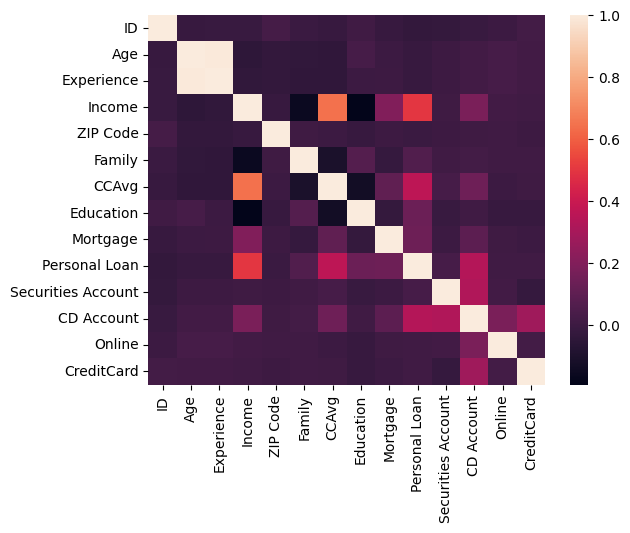

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# df['Mortgage_ballanced'] = (df['Mortgage'] - df['Mortgage'].mean()) / np.std(df['Mortgage'])
# df = df.loc[(stats.zscore(df['Mortgage_ballanced']) <= 3)]
# df = df.drop('Mortgage_ballanced', axis=1)

In [ ]:
df = df.drop(['ID', 'ZIP Code', 'Experience'], axis=1)

In [ ]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

train_data, test_data, train_labels, test_labels = train_test_split(X,y,
                                                                    test_size=0.2,
                                                                    random_state=random_state,
                                                                    stratify=y)

criterion='entropy', class_weight='balanced'



In [ ]:
decisionTree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
decisionTree.fit(train_data, train_labels)
predictions = decisionTree.predict(test_data)

In [ ]:
f1_score(test_labels, predictions)

0.9411764705882352

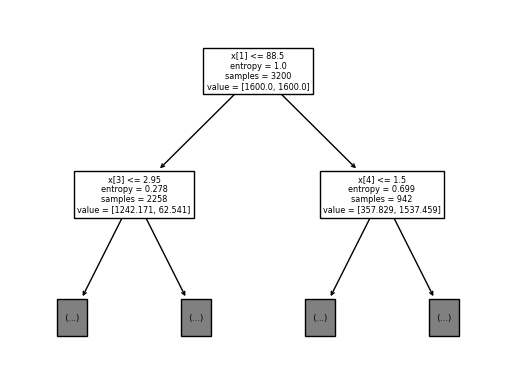

In [ ]:
from sklearn import tree
tree.plot_tree(decisionTree, max_depth= 1);

### Предсказания

In [ ]:
data = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/dddc0dd9f40894c81c3d3685d3a74f9d/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/Bank_Personal_Loan_Modelling_reserved.csv')

In [ ]:
data = data.drop(['ID', 'ZIP Code', 'Experience'], axis=1)

criterion='entropy', class_weight='balanced'

In [ ]:
predictions = decisionTree.predict(data)

In [ ]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,